# ข้อที่ 1

## อธิบายอัลกอริทึมในการหาค่าเทรชโฮลด์จากภาพระดับเทาใดๆ โดยอัตโนมัติ (Automatic Threshold) ที่ไม่ซ้ำกับที่กล่าวไปแล้วในห้องบรรยาย มาคนละ 2 อัลกอริทึม นักศึกษาควรทดลองใช้อัลกอริทึมดังกล่าวกับภาพระดับเทาใดๆ ภาพเดียวกัน แล้วอภิปรายผล

> Threshold ที่อาจารย์บรรยายคือ T = (max - min) / 2

### แสดงผลของ Thresold: T = (max-min)/2

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.imread("Hw2/shapes-01.jpg", 0)

In [3]:
print(f"Max value of grayscale pics: {img1.max()}")
print(f"Min value of grayscale pics: {img1.min()}")

Max value of grayscale pics: 255
Min value of grayscale pics: 0


In [4]:
##############################################################
# Gaussian Filtering
##############################################################
img1_blur = cv2.GaussianBlur(img1,(5,5),0)

In [5]:
img1_blur

array([[250, 250, 250, ..., 253, 254, 254],
       [250, 250, 250, ..., 253, 254, 254],
       [251, 251, 252, ..., 254, 254, 254],
       ...,
       [253, 252, 252, ..., 252, 252, 252],
       [252, 252, 252, ..., 253, 253, 253],
       [252, 252, 253, ..., 253, 253, 253]], dtype=uint8)

In [6]:
print(f"Max value of grayscale pics after Mean Filtering: {img1_blur.max()}")
print(f"Min value of grayscale pics after Mean Filtering: {img1_blur.min()}")

Max value of grayscale pics after Mean Filtering: 255
Min value of grayscale pics after Mean Filtering: 3


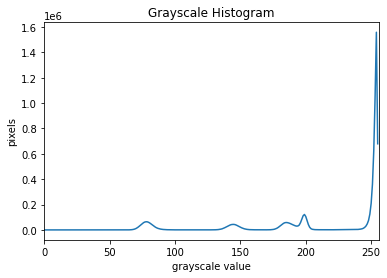

In [7]:
# create a histogram of the blurred grayscale image
histogram, bin_edges = np.histogram(img1_blur, bins=256, range=(0, 256))

fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 256)
plt.show()

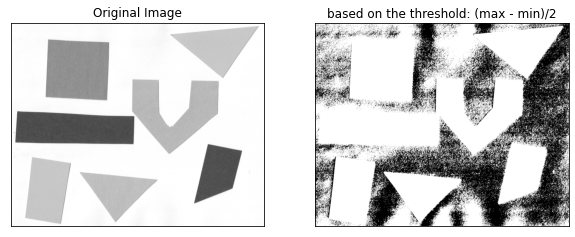

In [8]:
# create a mask based on the threshold
t = (np.max(img1_blur)) - (np.min(img1_blur)) / 2
    
binary_mask = img1_blur < t
     
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img1, 'gray'),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(binary_mask, 'gray'),plt.title('based on the threshold: (max - min)/2')
plt.xticks([]), plt.yticks([])
plt.show()

> ที่อาจารย์บรรยายในห้อง โดยการกำหนดค่า Thresold ดังสมการ (max-min)/2 และจากนั้น ก็หาค่า pixel ใดๆที่มีค่า น้อยกว่า t จะได้ดังภาพ

### Adaptive Mean Thresholding 

In [9]:
thresh = cv2.adaptiveThreshold(img1_blur, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 51, 10)

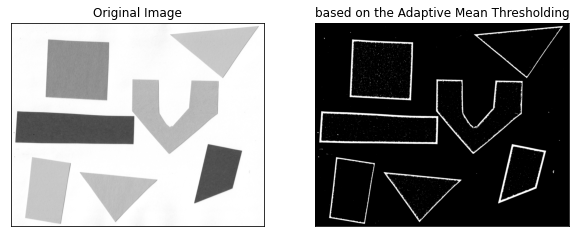

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img1, 'gray'),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh, 'gray'),plt.title('based on the Adaptive Mean Thresholding')
plt.xticks([]), plt.yticks([])
plt.show()

### Adaptive Gussian Thresholding

In [11]:
thresh2 = cv2.adaptiveThreshold(img1_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 51, 10)

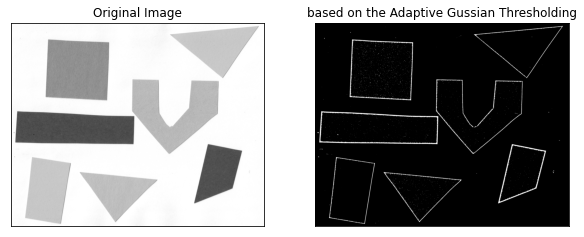

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img1, 'gray'),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh2, 'gray'),plt.title('based on the Adaptive Gussian Thresholding')
plt.xticks([]), plt.yticks([])
plt.show()

### Simple Thresholding

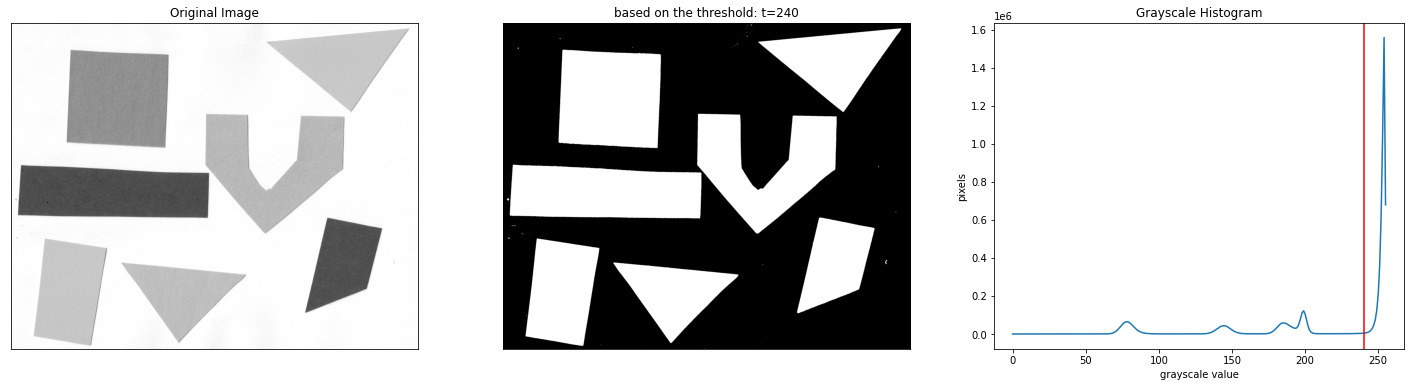

In [13]:
t = 240 # ดูจากราฟ Histogram
    
binary_mask2 = img1_blur < t
     
plt.figure(figsize=(25,6))
plt.subplot(131),plt.imshow(img1, 'gray'),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(binary_mask2, 'gray'),plt.title('based on the threshold: t=240')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.plot(bin_edges[0:-1], histogram),plt.axvline(x = 240, color = 'r')
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.show()

> Simple Thresholding คือ นำค่า grayscale level ของแต่ละ pixel มา plot กราฟ แล้วจะได้ ช่วงของ t จากนั้น จึงกำหนดค่าที่ต้องการดังรูปด้านบน

# ข้อ 2

## จากรูปที่กำหนดให้
##     - นักศึกษาที่เลขทะเบียน หลักรองสุดท้าย เป็นเลขคู่ ทำงานกับภาพ circle.jpg
## จงคิดและเขียนอัลกอริทึมเพื่อนับจำนวนวงกลมหรือสามเหลี่ยมในภาพให้ได้เท่า (หรือใกล้เคียงมากที่สุด) กับจำนวนที่นับด้วยคน อธิบายวิธี/ขั้นตอน/อัลกอริทึมที่ใช้


In [14]:
img_ex2 = cv2.imread("hw2/circles.JPG")
gray_img = cv2.cvtColor(img_ex2, cv2.COLOR_BGR2GRAY)

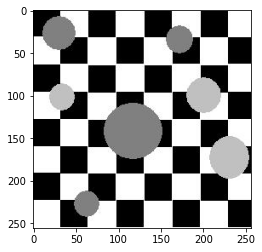

In [15]:
plt.imshow(img_ex2)

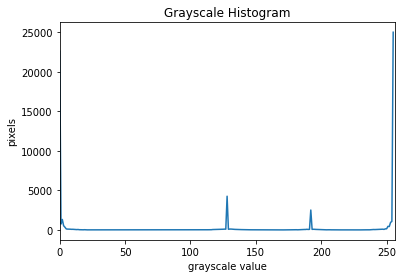

In [16]:
# create a histogram of the grayscale image
histogram3, bin_edges3 = np.histogram(gray_img, bins=256, range=(0, 256))

fig, ax = plt.subplots()
plt.plot(bin_edges3[0:-1], histogram3)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 256)
plt.show()

In [17]:
circles = cv2.HoughCircles(gray_img,cv2.HOUGH_GRADIENT,1,30,param1=100,param2=28,minRadius=0,maxRadius=0)

In [18]:
circles

array([[[117.5, 143.5,  35.1],
        [ 62.5, 226.5,  14.5],
        [ 33.5, 100.5,  15. ],
        [192.5,  92.5,  29.7],
        [233.5, 173.5,  26.8],
        [172.5,  33.5,  15. ]]], dtype=float32)

In [19]:
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
 # draw the outer circle
 cv2.circle(img_ex2,(i[0],i[1]),i[2],(0,255,0),2)
 # draw the center of the circle
 cv2.circle(img_ex2,(i[0],i[1]),2,(0,0,255),3)

(-0.5, 255.5, 255.5, -0.5)

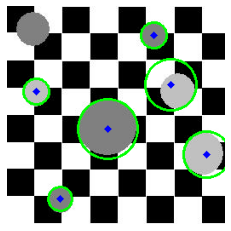

In [20]:
plt.imshow(img_ex2)
plt.axis("off")

### อธิบาย
> 1. หลังจากนำภาพเข้าแล้ว ก็แปลงเป็น grayscale
> 2. ทำการ plot grayscale histogram เพื่อดูลักษณะของภาพ
> 3. ทำการหาวงกลมด้วย Hough Tranform technique จาก module ของ opencv
> 4. ทำการแสดงผลภาพและ plot วงกลม และจุดศูนย์กลางที่หาได้

# ข้อที่ 3

## จากรูปที่กำหนดให้ต่อไปนี้ ให้นักศึกษาทดลองใช้อัลกอริทึมที่ใช้ในข้อที่ 1. เพื่อนับจำนวนสัตว์ในภาพ

##     - เลขทะเบียนสองหลักสุดท้ายอยู่ในช่วง 30-59 ทำงานกับภาพ ani01.jpg, ani03.jpg และ ani05.jpg

##     พิจารณาผลที่ได้ว่าใกล้เคียงกับการนับด้วยคนหรือไม่ อย่างไร ลองพยายามหาวิธีปรับปรุงอัลกอริทึมของตนเพื่อให้ได้ผลลัพธ์ที่ดียิ่งขึ้นสำหรับแต่ละภาพ อธิบายแนวคิดและวิธีการ/ขั้นตอน/อัลกอริทึม (ใหม่) ที่ใช้ รวมทั้งอภิปรายผลที่ได้

In [21]:
#ani01.jpg
ex3_pic1 = cv2.imread("hw2/ani01.jpg")
ex3_pic1_rgb = cv2.cvtColor(ex3_pic1, cv2.COLOR_BGR2RGB)
#ani03.jpg
ex3_pic2 = cv2.imread("hw2/ani03.jpg")
ex3_pic2_rgb = cv2.cvtColor(ex3_pic2, cv2.COLOR_BGR2RGB)
#ani05.jpg
ex3_pic3 = cv2.imread("hw2/ani05.jpg")
ex3_pic3_rgb = cv2.cvtColor(ex3_pic3, cv2.COLOR_BGR2RGB)

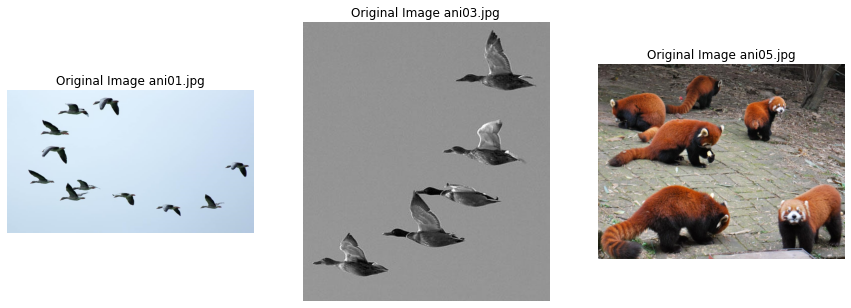

In [22]:
plt.figure(figsize=(15,15))
plt.subplot(131),plt.imshow(ex3_pic1_rgb),plt.title('Original Image ani01.jpg')
plt.axis("off")
plt.subplot(132),plt.imshow(ex3_pic2_rgb),plt.title('Original Image ani03.jpg')
plt.axis("off")
plt.subplot(133),plt.imshow(ex3_pic3_rgb),plt.title('Original Image ani05.jpg')
plt.axis("off")
plt.show()

In [23]:
################
# ani01.jpg
################
# convert to grayscale
ex3_pic1_grey = cv2.cvtColor(ex3_pic1, cv2.COLOR_RGB2GRAY)

# Gaussian Filtering
ex3_pic1_grey_blur = cv2.GaussianBlur(ex3_pic1_grey,(5,5),0)

# Adaptive Gaussian Thresholding
ex3_pic1_grey_thresh = cv2.adaptiveThreshold(ex3_pic1_grey_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 51, 10)
dilated_ex3_pic1 = cv2.dilate(ex3_pic1_grey_thresh, (1, 1), iterations=0)
(cnt, hierarchy) = cv2.findContours(dilated_ex3_pic1.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
ex3_pic1_rgbx = cv2.cvtColor(ex3_pic1, cv2.COLOR_BGR2RGB)
cv2.drawContours(ex3_pic1_rgbx, cnt, -1, (0, 255, 0), 2)
# plt.imshow(ex3_pic1_rgb)
################
# ani03.jpg
################
# convert to grayscale
ex3_pic2_grey = cv2.cvtColor(ex3_pic2, cv2.COLOR_RGB2GRAY)

# Gaussian Filtering
ex3_pic2_grey_blur = cv2.GaussianBlur(ex3_pic2_grey,(5,5),0)

# Adaptive Gaussian Thresholding
ex3_pic2_grey_thresh = cv2.adaptiveThreshold(ex3_pic2_grey_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 51, 10)
dilated_ex3_pic2 = cv2.dilate(ex3_pic2_grey_thresh, (1, 1), iterations=0)
(cnt, hierarchy) = cv2.findContours(dilated_ex3_pic2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
ex3_pic2_rgbx = cv2.cvtColor(ex3_pic2, cv2.COLOR_BGR2RGB)
cv2.drawContours(ex3_pic2_rgbx, cnt, -1, (0, 255, 0), 2)
# plt.imshow(ex3_pic2_rgb)

################
# ani05.jpg
################
# convert to grayscale
ex3_pic3_grey = cv2.cvtColor(ex3_pic3, cv2.COLOR_RGB2GRAY)

# Median Filtering
ex3_pic3_grey_blur = cv2.medianBlur(ex3_pic3_grey, 21)

# Adaptive Gaussian Thresholding
ex3_pic3_grey_thresh = cv2.adaptiveThreshold(ex3_pic3_grey_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 10)
dilated_ex3_pic3 = cv2.dilate(ex3_pic3_grey_thresh, (1, 1), iterations=0)
(cnt, hierarchy) = cv2.findContours(dilated_ex3_pic3.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
ex3_pic3_rgbx = cv2.cvtColor(ex3_pic3, cv2.COLOR_BGR2RGB)
cv2.drawContours(ex3_pic3_rgbx, cnt, -1, (0, 255, 0), 2)
# plt.imshow(ex3_pic3_rgb)

array([[[ 56,  51,  47],
        [ 59,  54,  50],
        [ 63,  58,  54],
        ...,
        [ 18,  18,  18],
        [ 16,  16,  16],
        [ 15,  15,  15]],

       [[ 83,  78,  74],
        [ 83,  78,  74],
        [ 84,  79,  75],
        ...,
        [ 17,  17,  17],
        [ 16,  16,  16],
        [ 15,  15,  15]],

       [[ 70,  65,  61],
        [ 71,  66,  62],
        [ 73,  68,  64],
        ...,
        [ 17,  17,  17],
        [ 16,  16,  16],
        [ 15,  15,  15]],

       ...,

       [[144, 144, 142],
        [190, 190, 188],
        [185, 185, 185],
        ...,
        [ 43,  31,  19],
        [ 47,  35,  23],
        [ 49,  36,  27]],

       [[165, 165, 163],
        [188, 188, 188],
        [162, 160, 163],
        ...,
        [ 43,  30,  21],
        [ 47,  34,  25],
        [ 49,  36,  28]],

       [[185, 185, 183],
        [185, 185, 185],
        [140, 138, 141],
        ...,
        [ 43,  30,  21],
        [ 47,  34,  25],
        [ 49,  36,  28]]

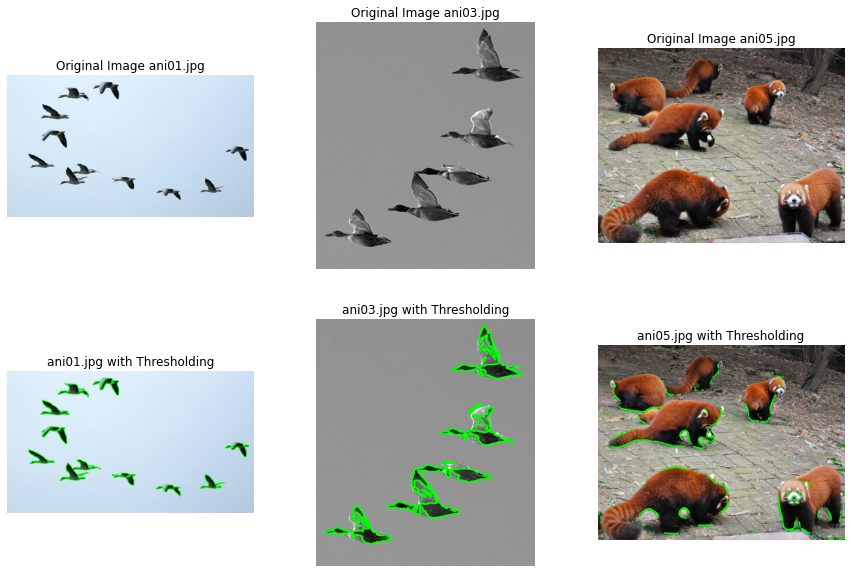

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(231),plt.imshow(ex3_pic1_rgb),plt.title('Original Image ani01.jpg')
plt.axis("off")
plt.subplot(232),plt.imshow(ex3_pic2_rgb),plt.title('Original Image ani03.jpg')
plt.axis("off")
plt.subplot(233),plt.imshow(ex3_pic3_rgb),plt.title('Original Image ani05.jpg')
plt.axis("off")
plt.subplot(234),plt.imshow(ex3_pic1_rgbx),plt.title('ani01.jpg with Thresholding')
plt.axis("off")
plt.subplot(235),plt.imshow(ex3_pic2_rgbx),plt.title('ani03.jpg with Thresholding')
plt.axis("off")
plt.subplot(236),plt.imshow(ex3_pic3_rgbx),plt.title('ani05.jpg with Thresholding')
plt.axis("off")
plt.show()

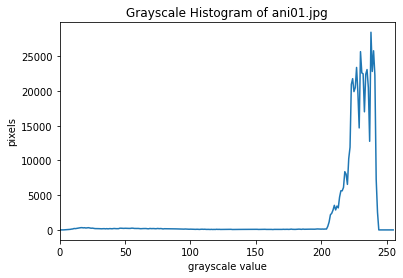

In [25]:
# create a histogram of the grayscale ani01 image
histogram_ex3_pic1, bin_edges_ex3_pic1 = np.histogram(ex3_pic1_grey_blur, bins=256, range=(0, 256))

fig, ax = plt.subplots()
plt.plot(bin_edges_ex3_pic1[0:-1], histogram_ex3_pic1)
plt.title("Grayscale Histogram of ani01.jpg")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 256)
plt.show()

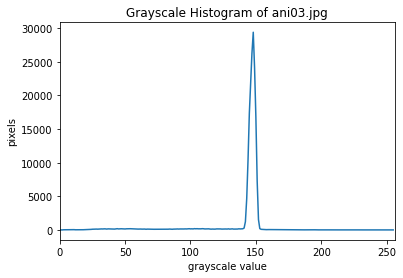

In [26]:
# create a histogram of the grayscale ani03 image
histogram_ex3_pic2, bin_edges_ex3_pic2 = np.histogram(ex3_pic2_grey_blur, bins=256, range=(0, 256))

fig, ax = plt.subplots()
plt.plot(bin_edges_ex3_pic2[0:-1], histogram_ex3_pic2)
plt.title("Grayscale Histogram of ani03.jpg")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 256)
plt.show()

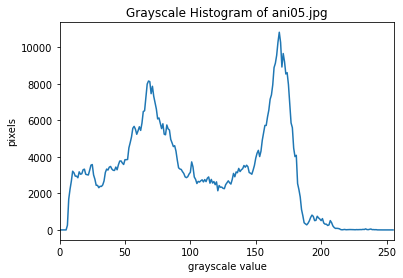

In [27]:
# create a histogram of the grayscale ani05 image
histogram_ex3_pic3, bin_edges_ex3_pic3 = np.histogram(ex3_pic3_grey_blur, bins=256, range=(0, 256))

fig, ax = plt.subplots()
plt.plot(bin_edges_ex3_pic3[0:-1], histogram_ex3_pic3)
plt.title("Grayscale Histogram of ani05.jpg")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 256)
plt.show()

## อธิบาย ข้อที่ 3
> วิธีการหา ทำดังนี้
> 1. นำภาพเข้า จากนั้นแปลงเป็น grayscale
> 2. ทำการ filtering โดยภาพ ani01 และ ani03 จะใช้ guassin filter แต่ ani05 จะใช้ mean filter
> 3. ทำ Auto Thresolding โดยวิธี Adaptive Gaussian Thresholding
> 4. ทำการ Dilation ภาพ
> 5. ทำการหาขอบ ด้วย findContours
> 6. ทำการวาดขอบ ด้วย drawContours
> 7. แสดงภาพผลลัพธ์

## ข้อสังเกตุ
> ภาพ ani01 และ ani03 นั้น ทำการ segmentation ได้ไม่ยาก เพราะ ลักษณะของภาพ grayscale histogram ที่ง่ายต่อการ segment ซึ่งจะแคกต่างจาก ภาพ ani05 พอสมควร

# ข้อที่ 4

## ให้นักศึกษาเลือกทำงานกับรูปใดรูปหนึ่งจากรูปต่อไปนี้ eye1.jpg, eye2.jpg หรือ retina1.jpg
##     - สำหรับรูป eye1.jpg หรือ eye2.jpg ให้พยายาม detect(ขอบ)ตาดำ ให้ได้ขอบที่สมบูรณ์ที่สุด
##     - สำหรับ retina1.jpg ให้พยายาม detect (ขอบ)เส้นเลือด/เส้ยประสาทที่จอประสาทตา ให้ได้ขอบเส้นเลือด/เส้นประสาทที่สมบูรณ์ที่สุด

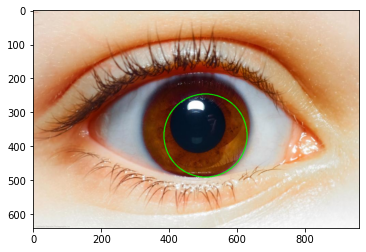

In [28]:
img = cv2.imread("hw2/eye1.jpg")
img_grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Median Filtering
img_grey_blur = cv2.medianBlur(img_grey, 31)

# OTSU Thresholding
_,iris = cv2.threshold(img_grey_blur,245,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Hough Tranform
circles = cv2.HoughCircles(iris,cv2.HOUGH_GRADIENT,1, 100, param1=180,param2=29,minRadius=10,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
 # draw the outer circle
 cv2.circle(img_ori,(i[0],i[1]),i[2],(0,255,0),2)


plt.imshow(img_ori)